In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [4]:
DATASET_ID = 'buckeye'

In [5]:
datasets = list((DATA_DIR / 'embeddings' / DATASET_ID / 'indvs').glob('*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])

In [6]:
datasets[:3]

ds indv                                               _loc
0  indvs  s35  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
1  indvs  s38  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
2  indvs  s23  /mnt/cube/tsainbur/Projects/github_repos/avgn_...

In [9]:
syllable_df = pd.read_pickle(datasets.iloc[0]['_loc'])

In [10]:
syllable_df[:3]

start_time  end_time labels  word  utterance_number  position_in_utterance  \
0    0.252000  0.298171     th  that                 0                      1   
1    0.298171  0.425415     eh  that                 1                      1   
2    0.425415  0.472113     tq  that                 2                      1   

   position_in_word  word_number indv  indvi age sex     key   rate  \
0                 0            1  s35      0   o   m  s3503b  16000   
1                 1            1  s35      0   o   m  s3503b  16000   
2                 2            1  s35      0   o   m  s3503b  16000   

                                         spectrogram  \
0  [[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9,...   
1  [[7, 7, 126, 156, 143, 142, 125, 152, 127, 140...   
2  [[11, 11, 11, 11, 160, 155, 133, 19, 25, 62, 2...   

                                       umap  
0   [1.8916449546813965, 4.913429260253906]  
1  [5.158031940460205, 0.05007312074303627]  
2  [0.22751377522945404, 2.999117136001587]

s35


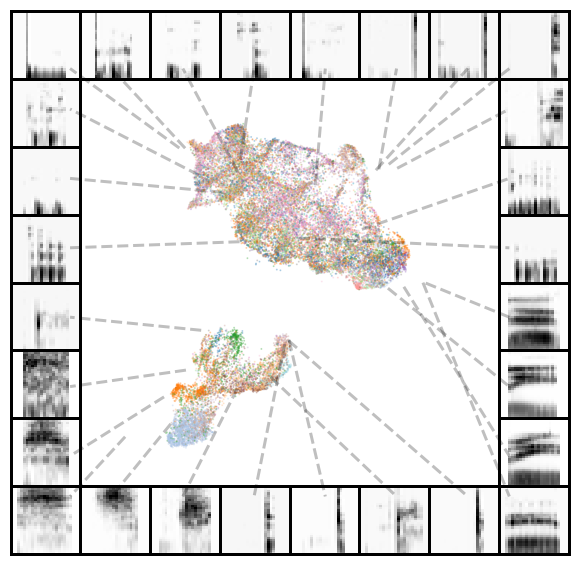

s38


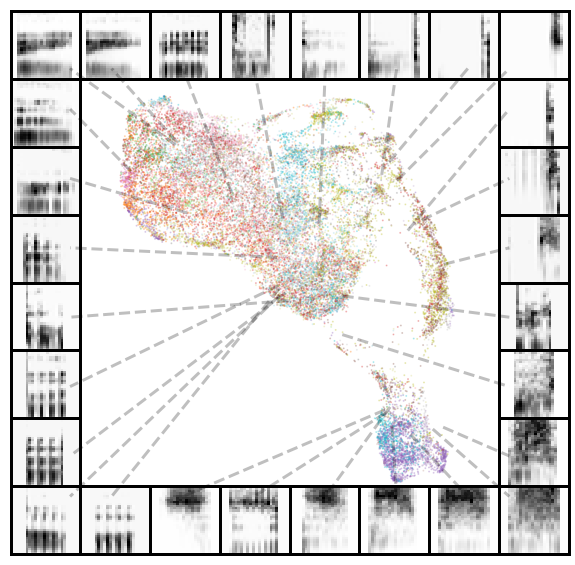

s23


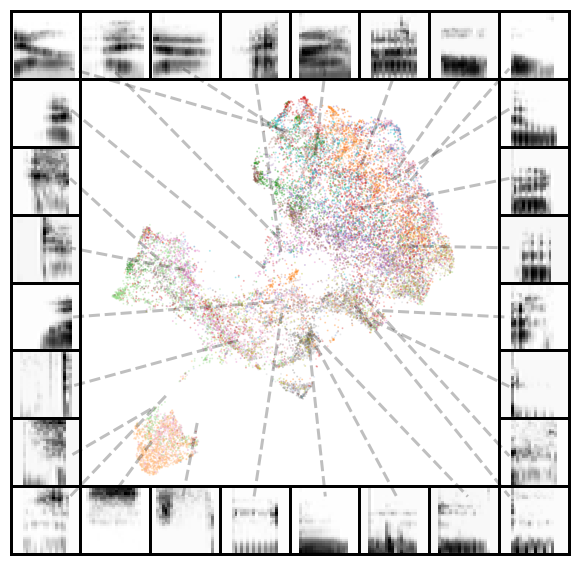

s14


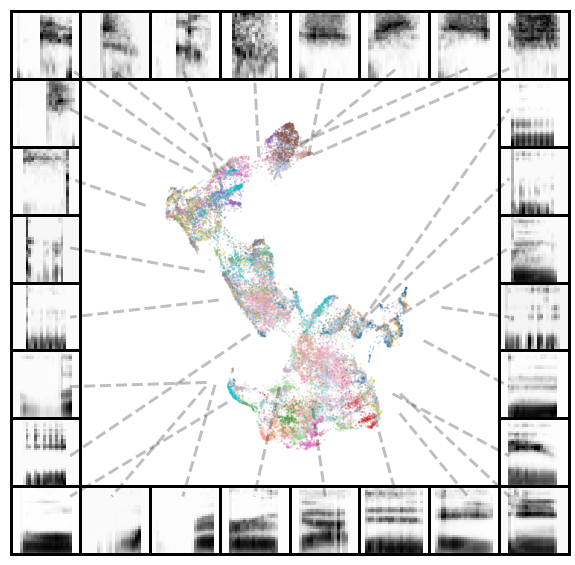

s19


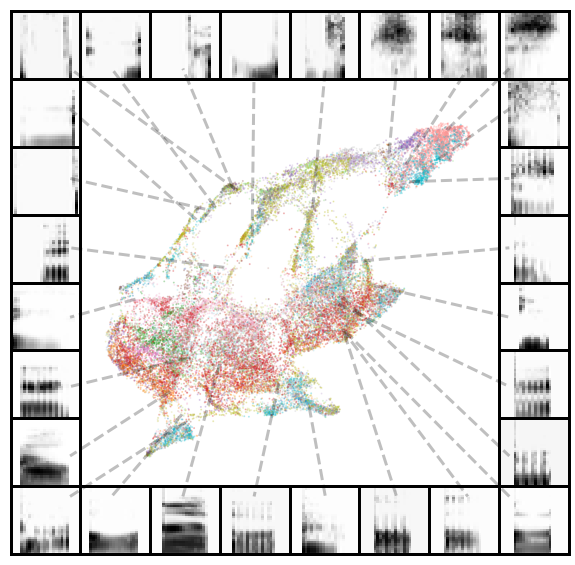

s02


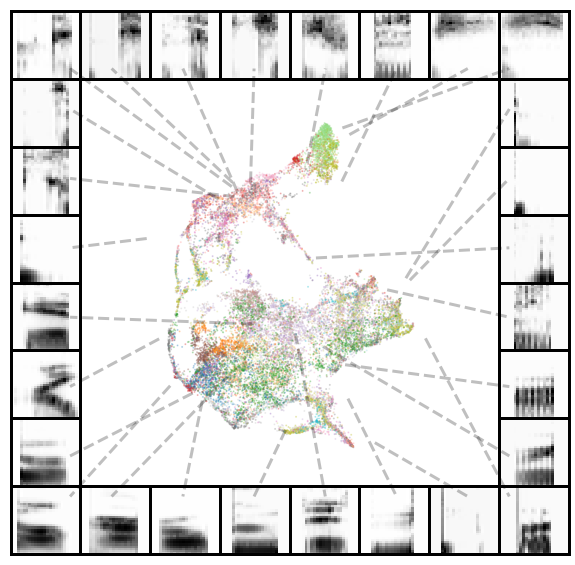

s37


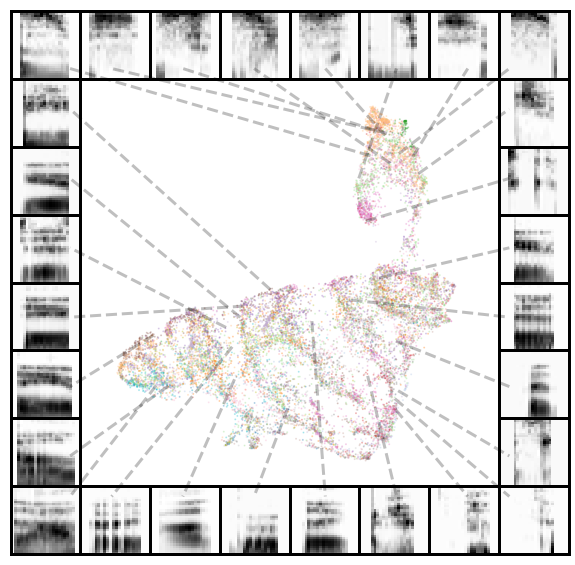

s21


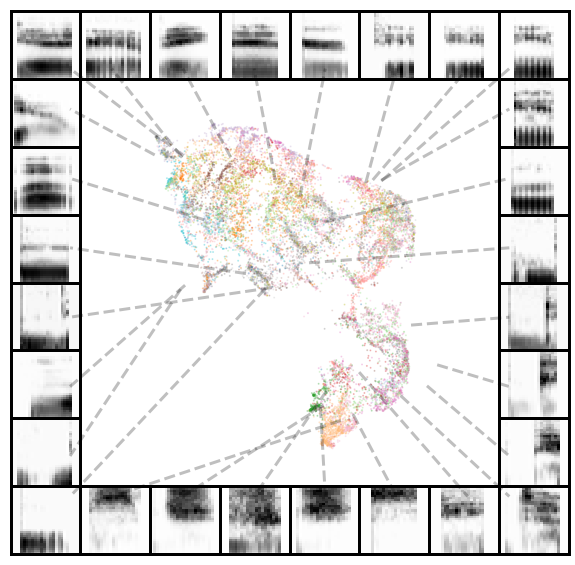

s16


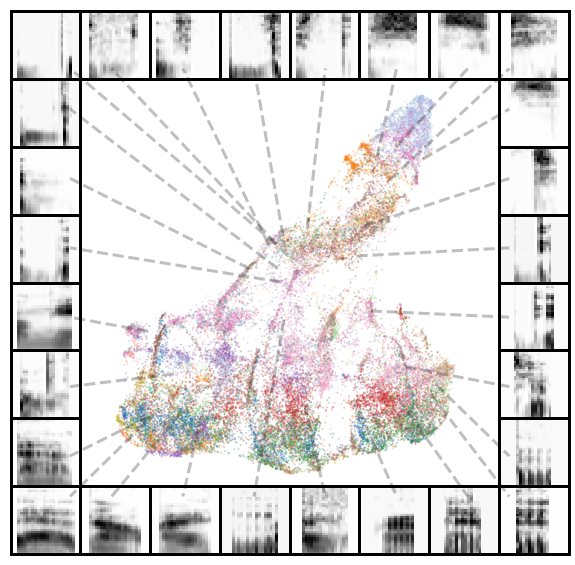

s40


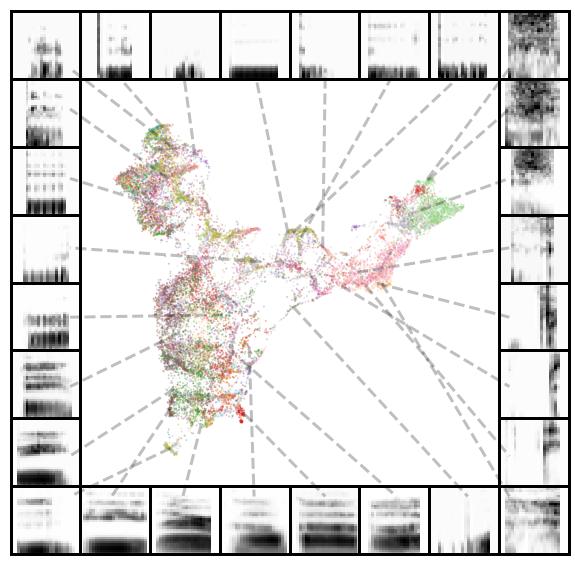

s27


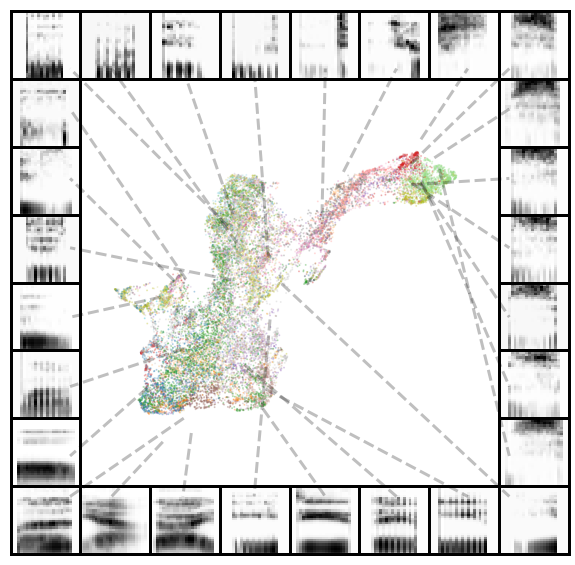

s31


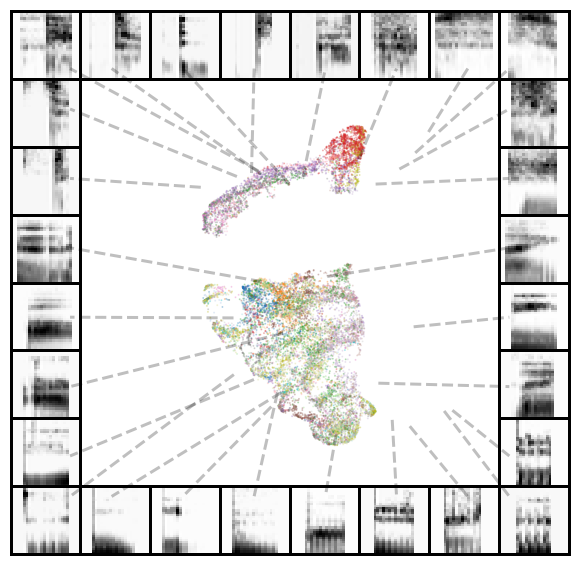

s06


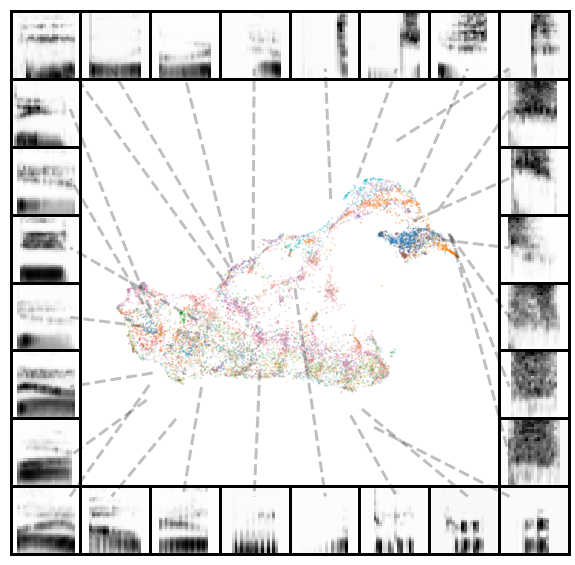

s10


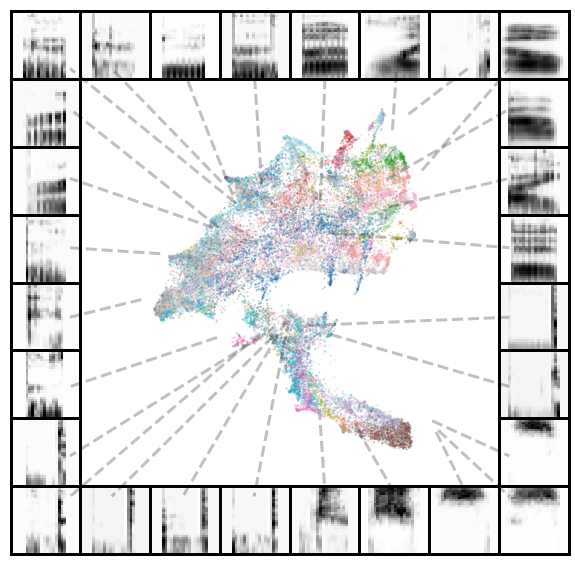

s25


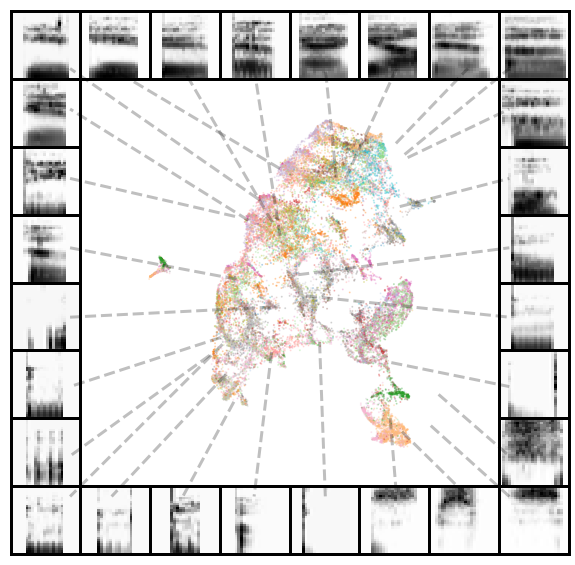

s33


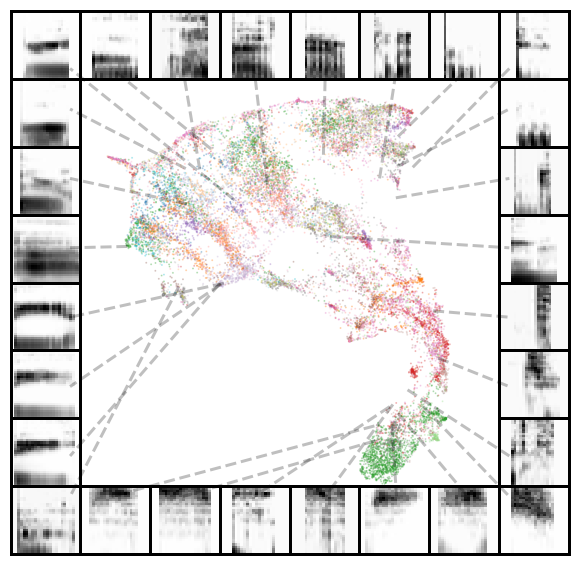

s28


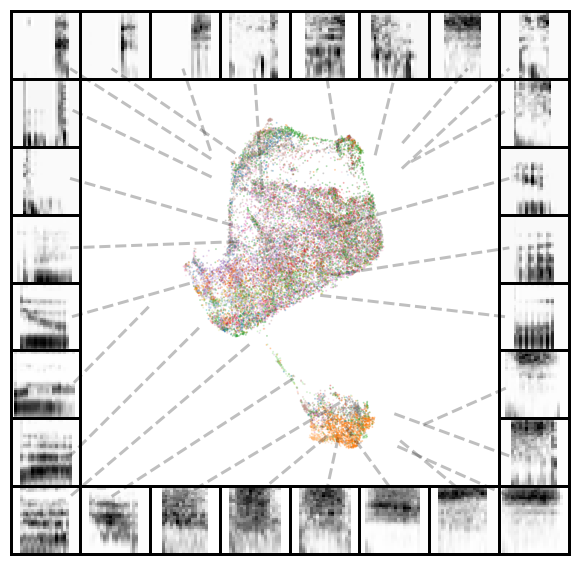

s04


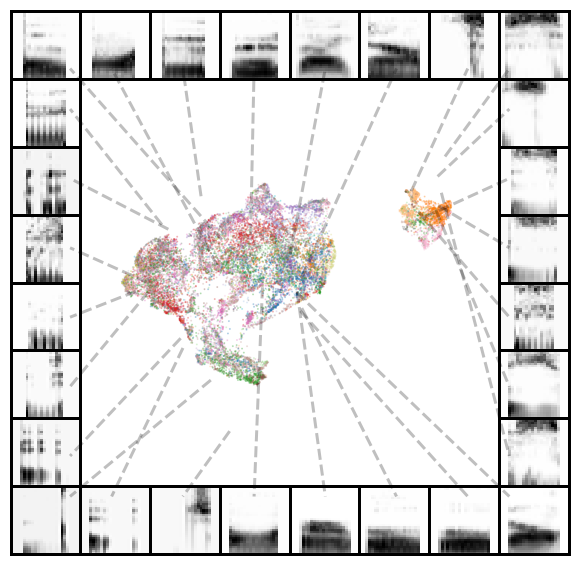

s12


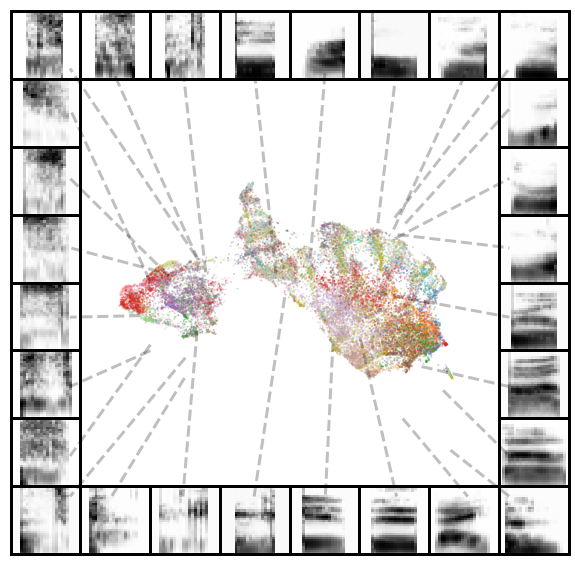

s09


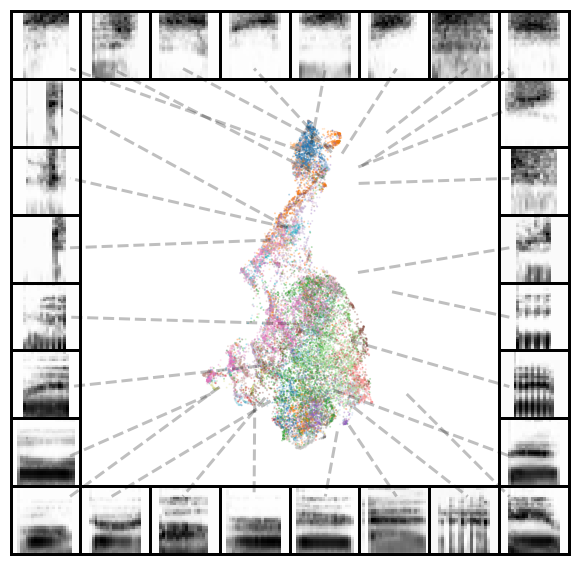

s11


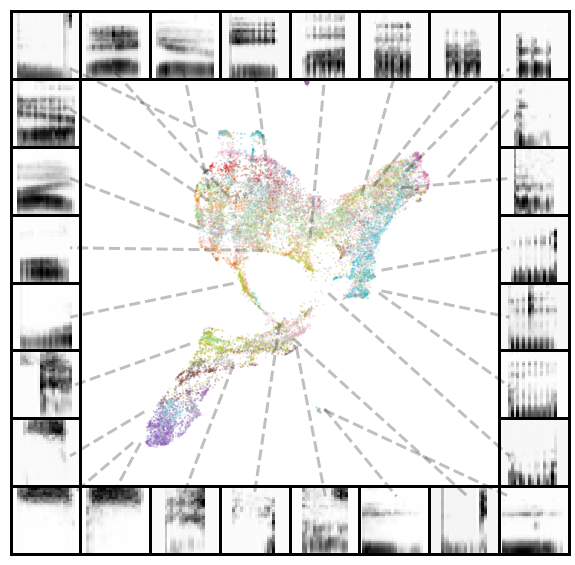

s07


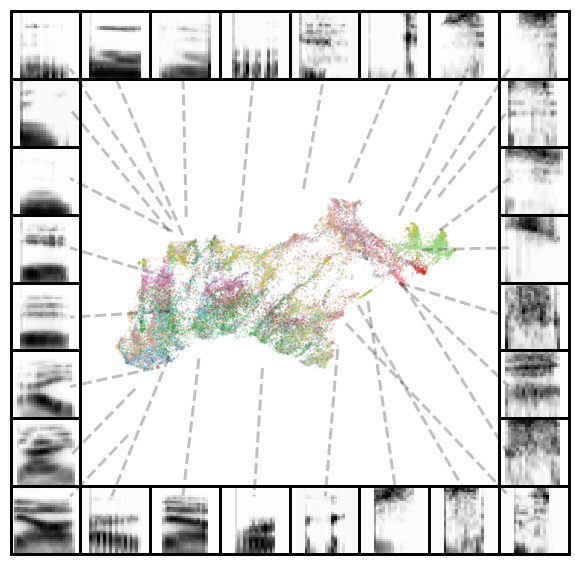

s30


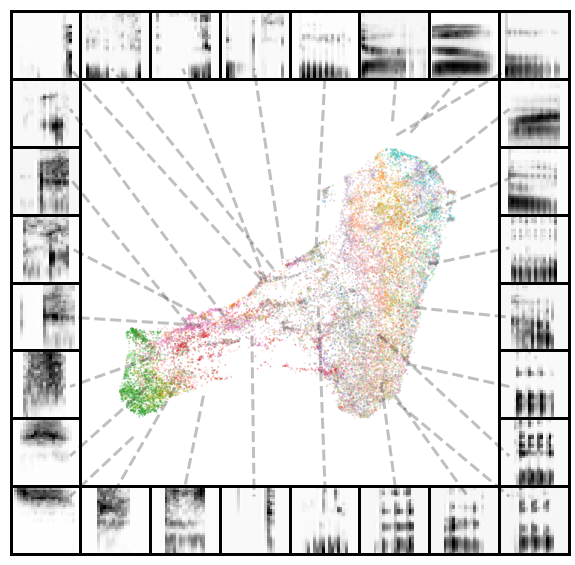

s26


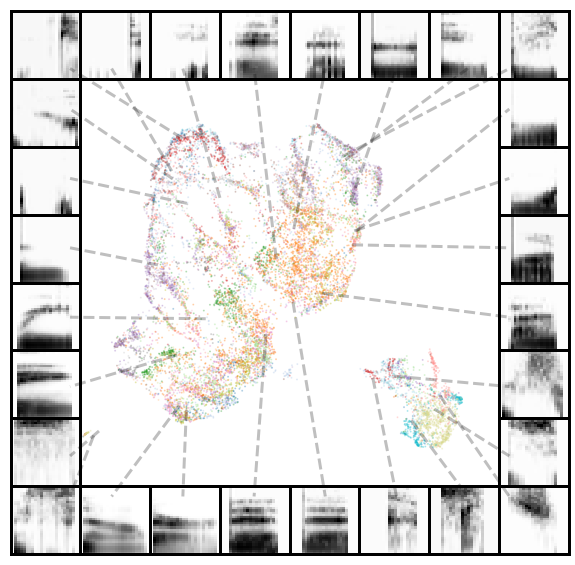

s13


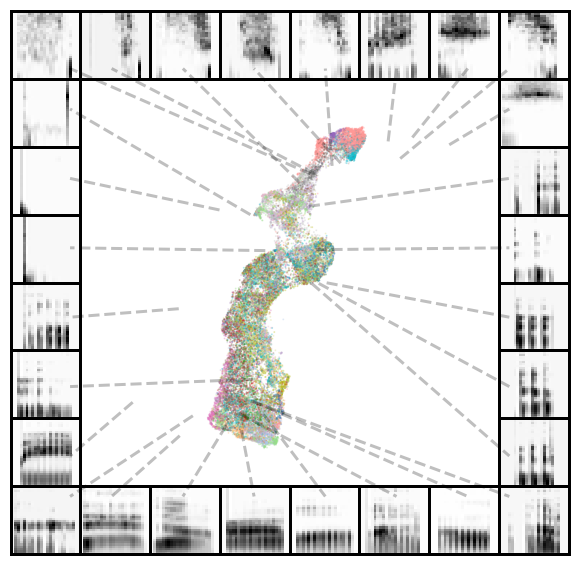

s08


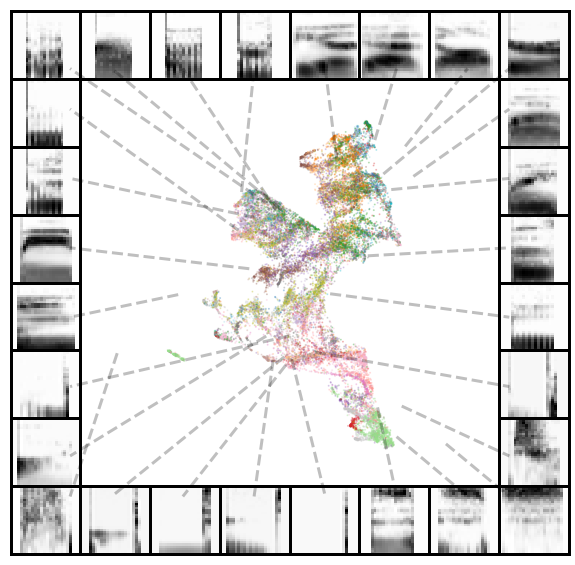

s05


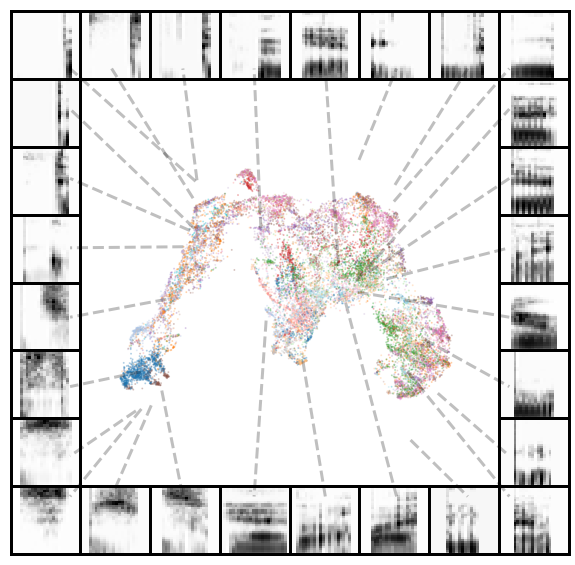

s32


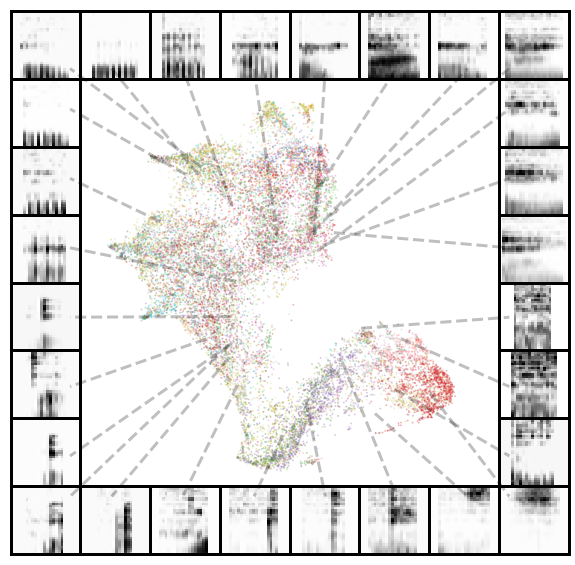

s29


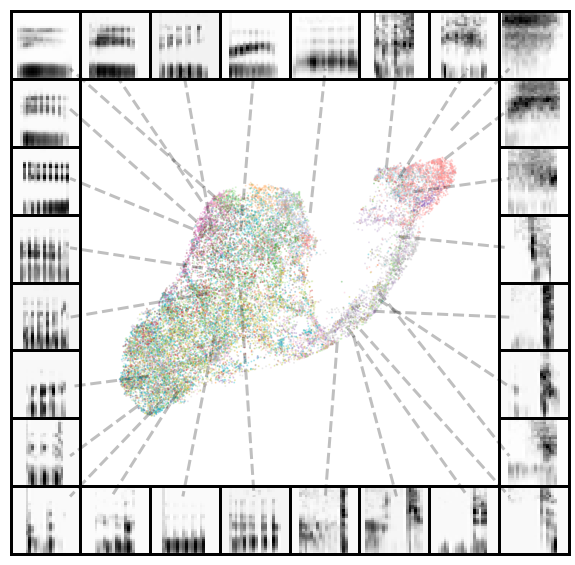

s24


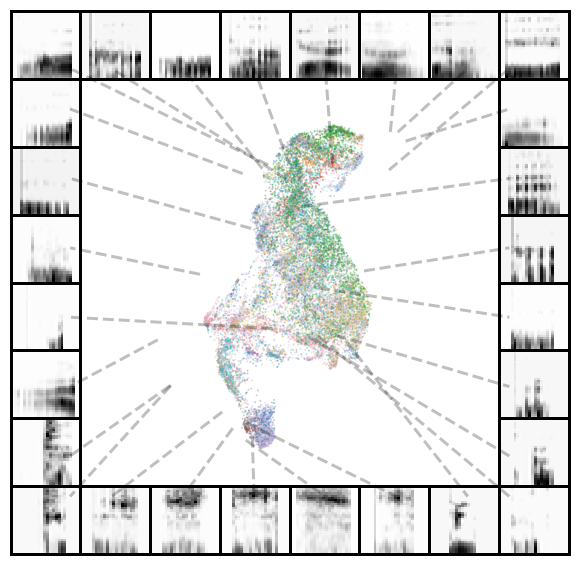

s18


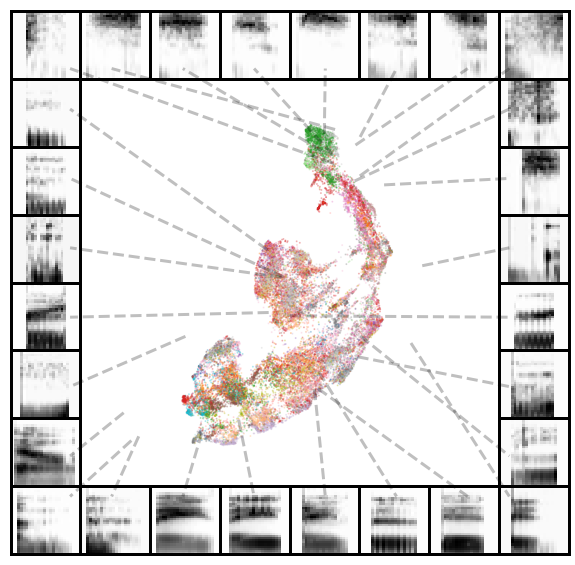

s03


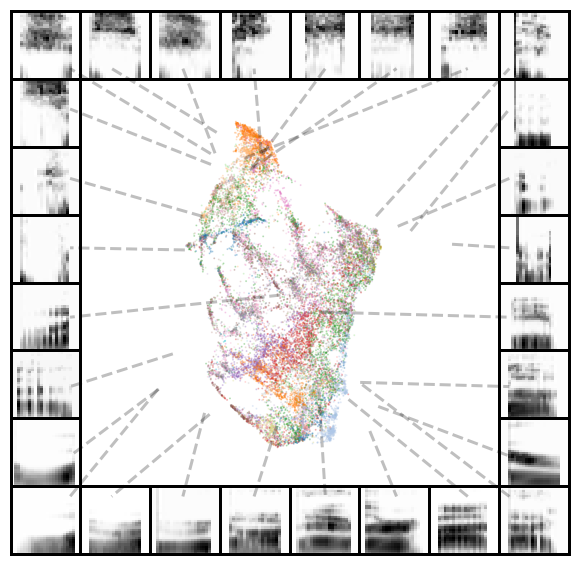

s15


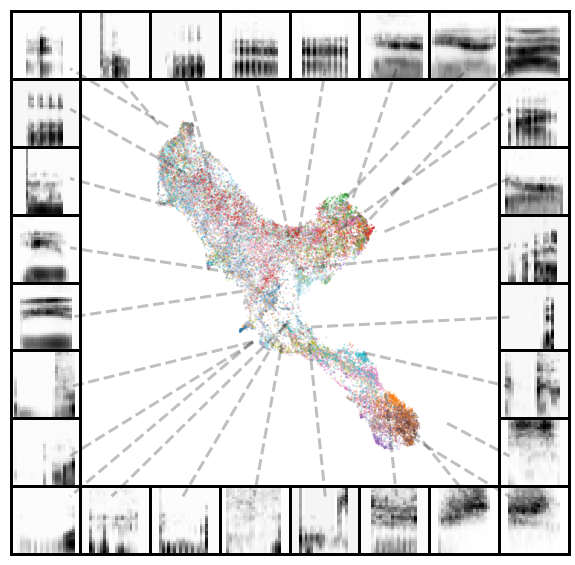

s39


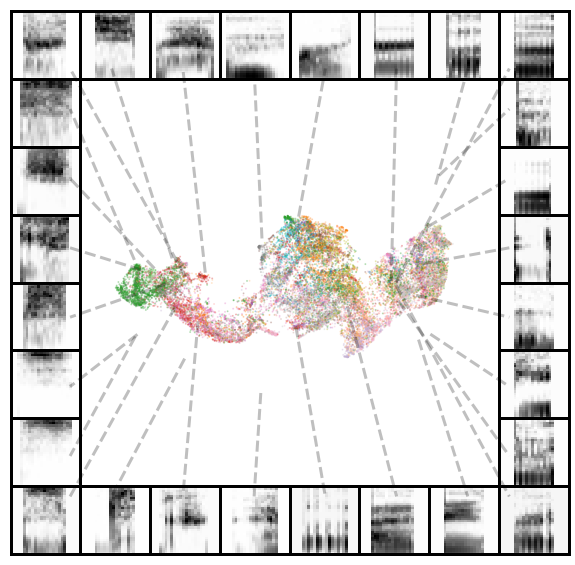

s22


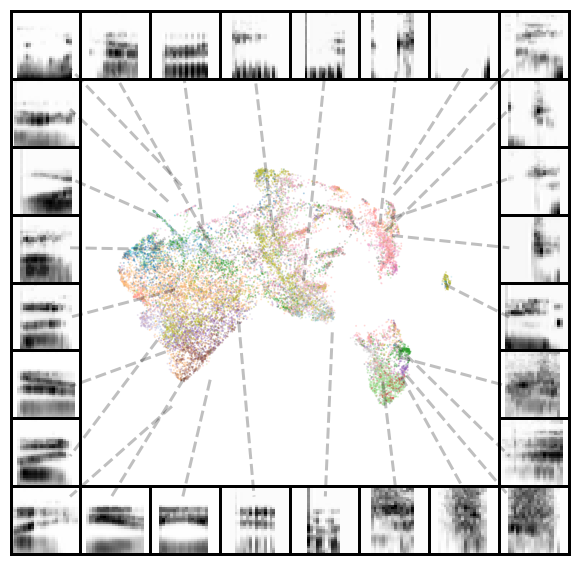

s34


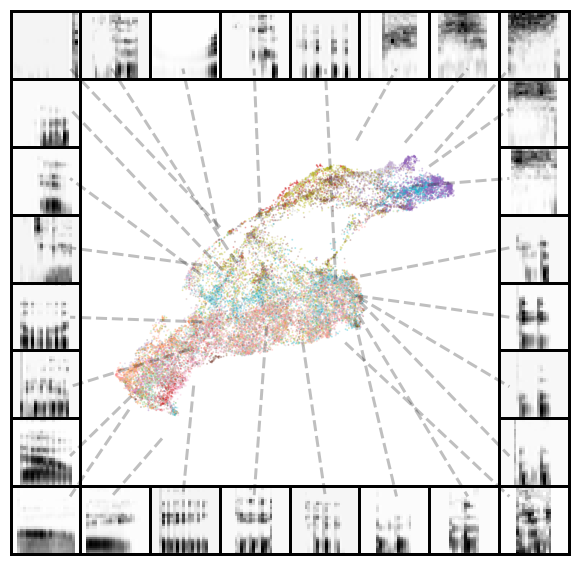

s01


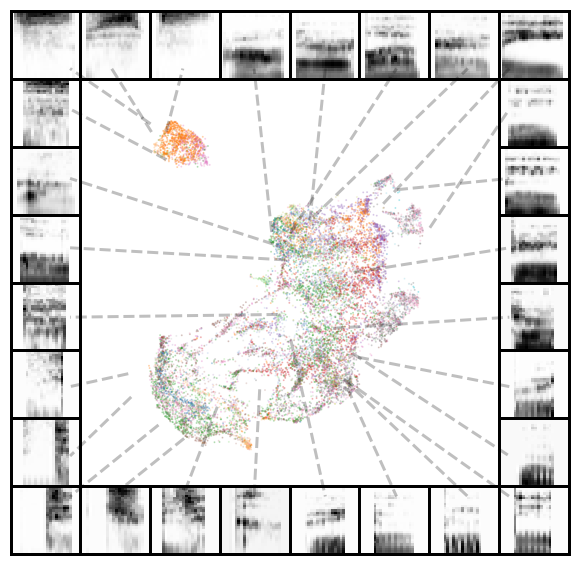

s17


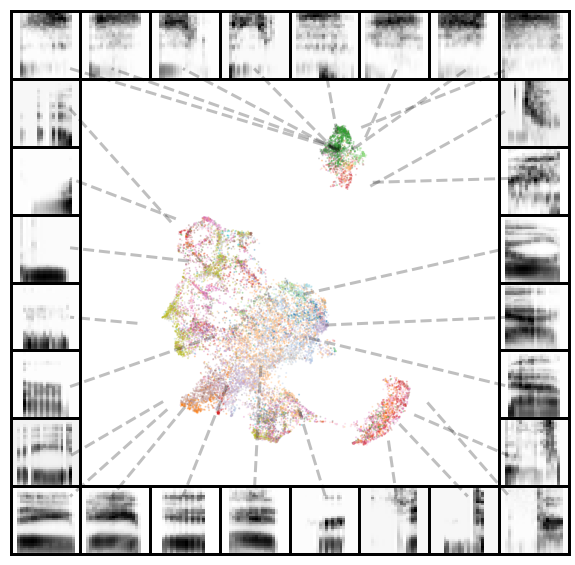

s20


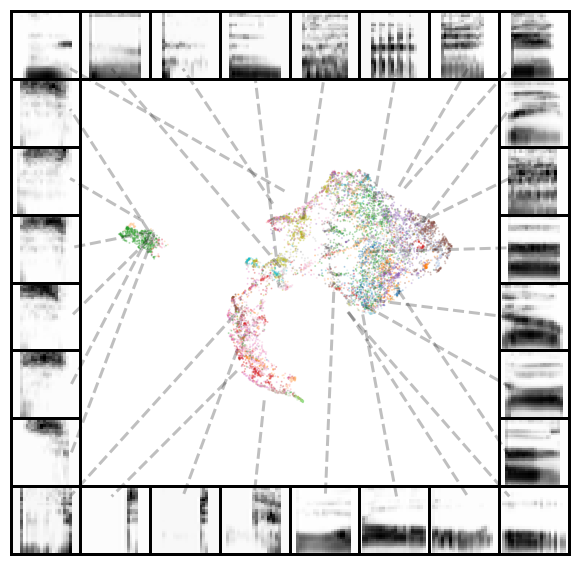

s36


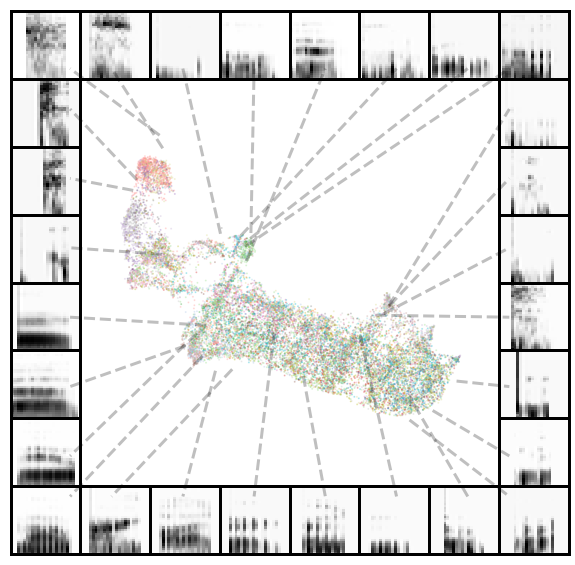

In [13]:
for idx, row in datasets.iterrows():
    syllable_df = pd.read_pickle(row['_loc'])
    embedding = np.vstack(syllable_df.umap.values)
    print(row.indv)
    specs = list(syllable_df.spectrogram.values)
    scatter_spec(
        embedding,
        specs,
        column_size=8,
        #x_range = [-4.5,4],
        #y_range = [-4.5,5.5],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        range_pad = 0.15,
        scatter_kwargs = {
            'labels': syllable_df.labels.values,
            'alpha': .25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,

    );
    plt.show()
    #save_fig(FIGURE_DIR / 'discrete_umap' / ds, dpi=300, save_jpg=True, save_png=True)
    #break